C:\Users\jagad\AppData\Local\Temp\ipykernel_10268\3042574529.py:7: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\jagad\Documents\GitHub\Graph-Anomaly-Detection\datasets\UNSW-NB15_1.csv', names=headers)


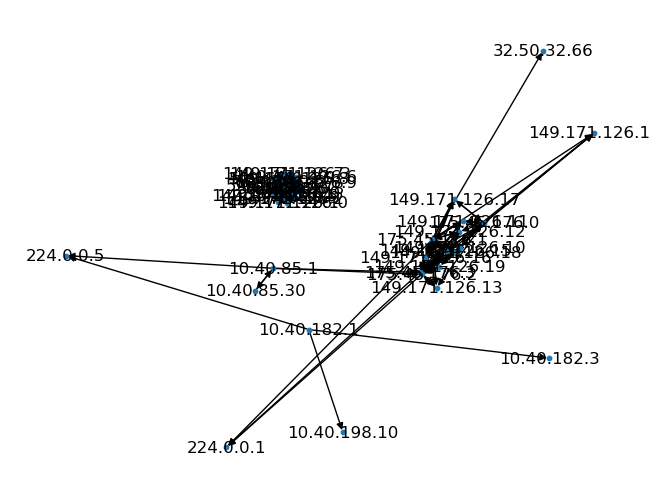

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

dfc = pd.read_csv(r'C:\Users\jagad\Documents\GitHub\Graph-Anomaly-Detection\datasets\NUSW-NB15_features.csv', encoding='cp1252')
headers = dfc.Name
df = pd.read_csv(r'C:\Users\jagad\Documents\GitHub\Graph-Anomaly-Detection\datasets\UNSW-NB15_1.csv', names=headers)

# Drop specified columns
columns_to_drop = ['dsport', 'sloss', 'dloss', 'Sintpkt', 'Dintpkt', 'Stime', 'Ltime', 'attack_cat']
df = df.drop(columns=columns_to_drop)

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Create a directed graph
G = nx.DiGraph()

# Iterate through the dataset and add nodes and edges to the graph
for index, row in df.iterrows():
    src_ip = row['srcip']
    dst_ip = row['dstip']
    if src_ip == dst_ip:
        continue
    # Add nodes
    G.add_node(src_ip)
    G.add_node(dst_ip)

    # Add directed edge with specified attributes
    edge_attributes = row.drop(['srcip', 'dstip']).to_dict()
    G.add_edge(src_ip, dst_ip, **edge_attributes)

# Remove self-loops
# G.remove_edges_from([(node, node) for node in G.nodes()])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=10)
plt.show()


In [5]:
import os

# Specify the path for the output GEXF file in the Downloads folder
output_file_path = os.path.join(os.path.expanduser('~'), r'C:\Users\jagad\Downloads', 'graph_output_dataset1.gexf')


# Write the graph to a GEXF file
nx.write_gexf(G, output_file_path)

print(f"Graph has been written to {output_file_path}")


Graph has been written to C:\Users\jagad\Downloads\graph_output_dataset1.gexf


In [18]:
print(df.columns)


Index(['srcip', 'sport', 'dstip', 'proto', 'state', 'dur', 'sbytes', 'dbytes',
       'sttl', 'dttl', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin',
       'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'sjit', 'djit', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object')


c:\Users\jagad\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jagad\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jagad\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


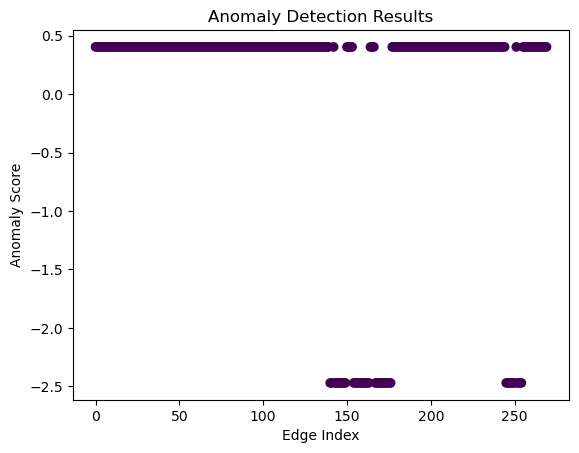

In [3]:
from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import StandardScaler

# Feature Engineering
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, name='degree_centrality')

# Anomaly Detection
edge_features = nx.get_edge_attributes(G, 'label')  # Assuming you have a 'label' attribute in the graph edges
X = pd.DataFrame.from_dict(edge_features, orient='index', columns=['label']).reset_index()
X = X.rename(columns={'index': 'edge', 'label': 'anomaly_score'})
X['anomaly_score'] = -X['anomaly_score']  # Reverse the label to use LOF for anomaly detection

# Standardize the features
scaler = StandardScaler()
X[['anomaly_score']] = scaler.fit_transform(X[['anomaly_score']])

# Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(contamination=0.1)  # Adjust contamination based on your dataset
X['anomaly_prediction'] = lof.fit_predict(X[['anomaly_score']])

# Visualize the anomaly scores
plt.scatter(range(len(X)), X['anomaly_score'], c=X['anomaly_prediction'], cmap='viridis')
plt.xlabel('Edge Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection Results')
plt.show()

C:\Users\jagad\AppData\Local\Temp\ipykernel_10976\72602675.py:8: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\jagad\Documents\GitHub\Graph-Anomaly-Detection\datasets\UNSW-NB15_1.csv', names=headers)


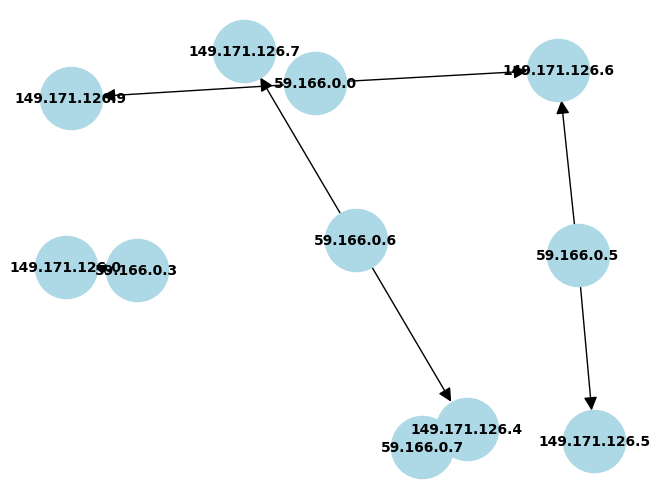

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your dataset
dfc = pd.read_csv(r'C:\Users\jagad\Documents\GitHub\Graph-Anomaly-Detection\datasets\NUSW-NB15_features.csv', encoding='cp1252')
headers = dfc.Name
df = pd.read_csv(r'C:\Users\jagad\Documents\GitHub\Graph-Anomaly-Detection\datasets\UNSW-NB15_1.csv', names=headers)

# Drop specified columns
columns_to_drop = ['dsport', 'sloss', 'dloss', 'Sintpkt', 'Dintpkt', 'Stime', 'Ltime', 'attack_cat']
df = df.drop(columns=columns_to_drop)

# Convert column names to lowercase
df.columns = df.columns.str.lower()

sample_df = df.head(10)

# Create a directed graph
G = nx.DiGraph()

# Iterate through the sample and add nodes and edges to the graph
for index, row in sample_df.iterrows():
    src_ip = row['srcip']
    dst_ip = row['dstip']
    if src_ip == dst_ip:
        continue
    # Add nodes
    G.add_node(src_ip)
    G.add_node(dst_ip)

    # Add directed edge with specified attributes
    edge_attributes = row.drop(['srcip', 'dstip']).to_dict()
    G.add_edge(src_ip, dst_ip, **edge_attributes)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_color='black', node_color='lightblue', font_weight='bold', arrowsize=20)
plt.show()


In [39]:
clustering_coefficient = nx.clustering(G)
print("Clustering Coefficient:")
print(clustering_coefficient)


Clustering Coefficient:
{'59.166.0.0': 0, '149.171.126.6': 0, '149.171.126.9': 0, '59.166.0.6': 0, '149.171.126.7': 0, '59.166.0.5': 0, '149.171.126.5': 0, '59.166.0.3': 0, '149.171.126.0': 0, '149.171.126.4': 0, '10.40.182.3': 0, '59.166.0.7': 0, '10.40.170.2': 0, '59.166.0.1': 0, '59.166.0.2': 0, '59.166.0.4': 0, '175.45.176.3': 0, '149.171.126.18': 0, '175.45.176.2': 0, '149.171.126.16': 0, '175.45.176.0': 0, '149.171.126.8': 0, '59.166.0.8': 0, '149.171.126.2': 0, '59.166.0.9': 0, '149.171.126.1': 0, '149.171.126.10': 0, '149.171.126.3': 0, '149.171.126.15': 0, '149.171.126.14': 0, '149.171.126.12': 0, '149.171.126.13': 0, '175.45.176.1': 0, '149.171.126.11': 0, '10.40.182.1': 0, '224.0.0.5': 0, '10.40.85.1': 0, '149.171.126.17': 0, '149.171.126.19': 0, '192.168.241.243': 0, '10.40.85.30': 0, '224.0.0.1': 0, '32.50.32.66': 0, '10.40.198.10': 0, '127.0.0.1': 0}


In [40]:
preferential_attachment_similarity = []
for u, v in G.edges():
    u_degree = G.out_degree(u)
    v_degree = G.in_degree(v)
    similarity = u_degree * v_degree
    preferential_attachment_similarity.append((u, v, similarity))

print("Preferential Attachment Similarity:")
for u, v, p in preferential_attachment_similarity:
    print(f"({u}, {v}): {p}")


Preferential Attachment Similarity:
(59.166.0.0, 149.171.126.6): 100
(59.166.0.0, 149.171.126.9): 100
(59.166.0.0, 149.171.126.1): 100
(59.166.0.0, 149.171.126.8): 100
(59.166.0.0, 149.171.126.3): 100
(59.166.0.0, 149.171.126.7): 100
(59.166.0.0, 149.171.126.0): 100
(59.166.0.0, 149.171.126.2): 100
(59.166.0.0, 149.171.126.4): 100
(59.166.0.0, 149.171.126.5): 100
(149.171.126.6, 59.166.0.4): 100
(149.171.126.6, 59.166.0.3): 100
(149.171.126.6, 59.166.0.6): 100
(149.171.126.6, 59.166.0.7): 100
(149.171.126.6, 59.166.0.1): 100
(149.171.126.6, 59.166.0.9): 100
(149.171.126.6, 59.166.0.8): 100
(149.171.126.6, 59.166.0.2): 100
(149.171.126.6, 59.166.0.5): 100
(149.171.126.6, 59.166.0.0): 100
(149.171.126.9, 59.166.0.6): 100
(149.171.126.9, 59.166.0.0): 100
(149.171.126.9, 59.166.0.1): 100
(149.171.126.9, 59.166.0.3): 100
(149.171.126.9, 59.166.0.7): 100
(149.171.126.9, 59.166.0.8): 100
(149.171.126.9, 59.166.0.2): 100
(149.171.126.9, 59.166.0.4): 100
(149.171.126.9, 59.166.0.5): 100
(149.17

In [41]:
undirected_G = G.to_undirected()
jaccard_similarity = nx.jaccard_coefficient(undirected_G)
print("Jaccard Similarity:")
for u, v, p in jaccard_similarity:
    print(f"({u}, {v}): {p}")


Jaccard Similarity:
(149.171.126.1, 175.45.176.1): 0.0
(149.171.126.1, 149.171.126.4): 1.0
(149.171.126.1, 10.40.85.1): 0.0
(149.171.126.1, 224.0.0.5): 0.0
(149.171.126.1, 10.40.198.10): 0.0
(149.171.126.1, 149.171.126.8): 1.0
(149.171.126.1, 149.171.126.5): 1.0
(149.171.126.1, 149.171.126.18): 0.0
(149.171.126.1, 149.171.126.16): 0.0
(149.171.126.1, 149.171.126.12): 0.0
(149.171.126.1, 149.171.126.13): 0.0
(149.171.126.1, 149.171.126.19): 0.0
(149.171.126.1, 224.0.0.1): 0.0
(149.171.126.1, 10.40.182.3): 0.0
(149.171.126.1, 149.171.126.7): 1.0
(149.171.126.1, 149.171.126.10): 0.0
(149.171.126.1, 175.45.176.2): 0.0
(149.171.126.1, 10.40.85.30): 0.0
(149.171.126.1, 149.171.126.2): 1.0
(149.171.126.1, 175.45.176.3): 0.0
(149.171.126.1, 192.168.241.243): 0.0
(149.171.126.1, 149.171.126.0): 1.0
(149.171.126.1, 149.171.126.11): 0.0
(149.171.126.1, 10.40.170.2): 0.0
(149.171.126.1, 149.171.126.14): 0.0
(149.171.126.1, 175.45.176.0): 0.0
(149.171.126.1, 149.171.126.3): 1.0
(149.171.126.1, 10.4

In [42]:
import math

adamic_adar_similarity = []
for u, v in G.edges():
    common_neighbors = set(G.successors(u)).intersection(G.predecessors(v))
    similarity = sum(1 / math.log(G.out_degree(neighbor)) for neighbor in common_neighbors if G.out_degree(neighbor) > 1)
    adamic_adar_similarity.append((u, v, similarity))

print("Adamic-Adar Similarity:")
for u, v, p in adamic_adar_similarity:
    print(f"({u}, {v}): {p}")


Adamic-Adar Similarity:
(59.166.0.0, 149.171.126.6): 0
(59.166.0.0, 149.171.126.9): 0
(59.166.0.0, 149.171.126.1): 0
(59.166.0.0, 149.171.126.8): 0
(59.166.0.0, 149.171.126.3): 0
(59.166.0.0, 149.171.126.7): 0
(59.166.0.0, 149.171.126.0): 0
(59.166.0.0, 149.171.126.2): 0
(59.166.0.0, 149.171.126.4): 0
(59.166.0.0, 149.171.126.5): 0
(149.171.126.6, 59.166.0.4): 0
(149.171.126.6, 59.166.0.3): 0
(149.171.126.6, 59.166.0.6): 0
(149.171.126.6, 59.166.0.7): 0
(149.171.126.6, 59.166.0.1): 0
(149.171.126.6, 59.166.0.9): 0
(149.171.126.6, 59.166.0.8): 0
(149.171.126.6, 59.166.0.2): 0
(149.171.126.6, 59.166.0.5): 0
(149.171.126.6, 59.166.0.0): 0
(149.171.126.9, 59.166.0.6): 0
(149.171.126.9, 59.166.0.0): 0
(149.171.126.9, 59.166.0.1): 0
(149.171.126.9, 59.166.0.3): 0
(149.171.126.9, 59.166.0.7): 0
(149.171.126.9, 59.166.0.8): 0
(149.171.126.9, 59.166.0.2): 0
(149.171.126.9, 59.166.0.4): 0
(149.171.126.9, 59.166.0.5): 0
(149.171.126.9, 59.166.0.9): 0
(59.166.0.6, 149.171.126.7): 0
(59.166.0.6, 14

In [44]:
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
print(degree_centrality)


Degree Centrality:
{'59.166.0.0': 0.4545454545454546, '149.171.126.6': 0.4545454545454546, '149.171.126.9': 0.4545454545454546, '59.166.0.6': 0.4545454545454546, '149.171.126.7': 0.4545454545454546, '59.166.0.5': 0.4545454545454546, '149.171.126.5': 0.4545454545454546, '59.166.0.3': 0.4545454545454546, '149.171.126.0': 0.4545454545454546, '149.171.126.4': 0.4545454545454546, '10.40.182.3': 0.022727272727272728, '59.166.0.7': 0.4545454545454546, '10.40.170.2': 0.0, '59.166.0.1': 0.4545454545454546, '59.166.0.2': 0.4545454545454546, '59.166.0.4': 0.4545454545454546, '175.45.176.3': 0.3181818181818182, '149.171.126.18': 0.1590909090909091, '175.45.176.2': 0.38636363636363635, '149.171.126.16': 0.13636363636363635, '175.45.176.0': 0.34090909090909094, '149.171.126.8': 0.4545454545454546, '59.166.0.8': 0.4545454545454546, '149.171.126.2': 0.4545454545454546, '59.166.0.9': 0.4545454545454546, '149.171.126.1': 0.4545454545454546, '149.171.126.10': 0.13636363636363635, '149.171.126.3': 0.45454

In [45]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:")
print(betweenness_centrality)


Betweenness Centrality:
{'59.166.0.0': 0.004756871035940804, '149.171.126.6': 0.004756871035940804, '149.171.126.9': 0.004756871035940804, '59.166.0.6': 0.004756871035940804, '149.171.126.7': 0.004756871035940804, '59.166.0.5': 0.004756871035940804, '149.171.126.5': 0.004756871035940804, '59.166.0.3': 0.004756871035940804, '149.171.126.0': 0.004756871035940804, '149.171.126.4': 0.004756871035940804, '10.40.182.3': 0.0, '59.166.0.7': 0.004756871035940804, '10.40.170.2': 0.0, '59.166.0.1': 0.004756871035940804, '59.166.0.2': 0.004756871035940804, '59.166.0.4': 0.004756871035940804, '175.45.176.3': 0.012098850761641461, '149.171.126.18': 0.003263403263403264, '175.45.176.2': 0.02546823331707053, '149.171.126.16': 0.004214777470591424, '175.45.176.0': 0.016428823114869626, '149.171.126.8': 0.004756871035940804, '59.166.0.8': 0.004756871035940804, '149.171.126.2': 0.004756871035940804, '59.166.0.9': 0.004756871035940804, '149.171.126.1': 0.004756871035940804, '149.171.126.10': 0.00177264595

In [46]:
import community
import networkx as nx
import matplotlib.pyplot as plt


G_undirected = G.to_undirected()

louvain_communities = community.community_louvain.best_partition(G_undirected)
print("Louvain Community Detection:")
print(louvain_communities)


Louvain Community Detection:
{'59.166.0.0': 2, '149.171.126.6': 2, '149.171.126.9': 2, '59.166.0.6': 2, '149.171.126.7': 2, '59.166.0.5': 2, '149.171.126.5': 2, '59.166.0.3': 2, '149.171.126.0': 2, '149.171.126.4': 2, '10.40.182.3': 3, '59.166.0.7': 2, '10.40.170.2': 0, '59.166.0.1': 2, '59.166.0.2': 2, '59.166.0.4': 2, '175.45.176.3': 1, '149.171.126.18': 1, '175.45.176.2': 1, '149.171.126.16': 1, '175.45.176.0': 1, '149.171.126.8': 2, '59.166.0.8': 2, '149.171.126.2': 2, '59.166.0.9': 2, '149.171.126.1': 2, '149.171.126.10': 1, '149.171.126.3': 2, '149.171.126.15': 1, '149.171.126.14': 1, '149.171.126.12': 1, '149.171.126.13': 1, '175.45.176.1': 1, '149.171.126.11': 1, '10.40.182.1': 3, '224.0.0.5': 3, '10.40.85.1': 3, '149.171.126.17': 1, '149.171.126.19': 1, '192.168.241.243': 4, '10.40.85.30': 3, '224.0.0.1': 1, '32.50.32.66': 1, '10.40.198.10': 3, '127.0.0.1': 5}


In [47]:
print(df.columns)


Index(['srcip', 'sport', 'dstip', 'proto', 'state', 'dur', 'sbytes', 'dbytes',
       'sttl', 'dttl', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin',
       'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'sjit', 'djit', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object')


C:\Users\jagad\AppData\Local\Temp\ipykernel_8956\3938144063.py:9: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\jagad\Documents\GitHub\Graph-Anomaly-Detection\datasets\combined_data.csv')


Error: 'bytes' attribute not found in edges.


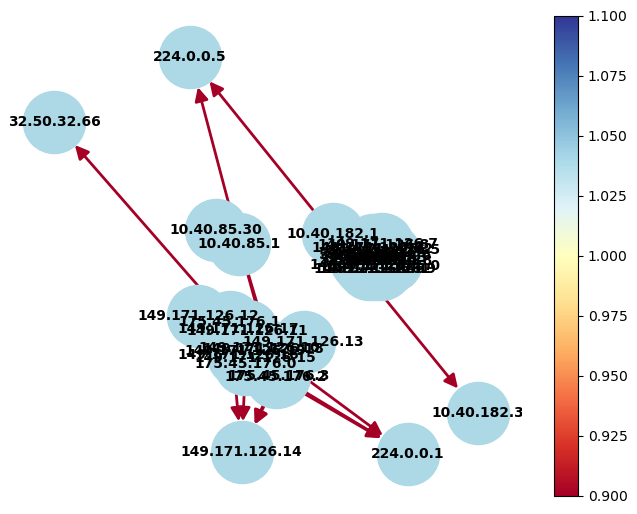

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load your dataset
df = pd.read_csv(r'C:\Users\jagad\Documents\GitHub\Graph-Anomaly-Detection\datasets\combined_data.csv')

# Drop specified columns
columns_to_drop = ['dsport', 'sloss', 'dloss', 'Sintpkt', 'Dintpkt', 'Stime', 'Ltime', 'attack_cat']
df = df.drop(columns=columns_to_drop)

# Convert column names to lowercase
df.columns = df.columns.str.lower()

sample_df = df.head(200000)

# Create a directed graph
G = nx.DiGraph()

# Iterate through the sample and add nodes and edges to the graph
for index, row in sample_df.iterrows():
    src_ip = row['srcip']
    dst_ip = row['dstip']
    if src_ip == dst_ip:
        continue
    # Add nodes
    G.add_node(src_ip)
    G.add_node(dst_ip)

    edge_attributes = row.drop(['srcip', 'dstip']).to_dict()
    G.add_edge(src_ip, dst_ip, **edge_attributes)

# Check if 'bytes' attribute is present in the edges
if 'bytes' not in nx.get_edge_attributes(G, 'bytes'):
    print("Error: 'bytes' attribute not found in edges.")
    # Handle this situation as needed, perhaps choose another attribute or check your data

# Standardize edge attributes for LOF
edge_attributes_matrix = StandardScaler().fit_transform(
    np.array([G[src][dst].get('bytes', 0) for src, dst in G.edges()]).reshape(-1, 1)
)

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_scores = lof.fit_predict(edge_attributes_matrix)

# Add outlier scores to the graph
for (src, dst), score in zip(G.edges(), outlier_scores):
    G[src][dst]['outlier_score'] = score

# Draw the graph with color-coded outliers
pos = nx.spring_layout(G)
edge_colors = [G[src][dst]['outlier_score'] for src, dst in G.edges()]

# Create a ScalarMappable
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu, norm=plt.Normalize(min(outlier_scores), max(outlier_scores)))
sm.set_array([])

# Draw the graph with color-coded outliers using the ScalarMappable
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_color='black', node_color='lightblue',
        font_weight='bold', arrowsize=20, edge_color=edge_colors, edge_cmap=plt.cm.RdYlBu, width=2)

# Add colorbar using the ScalarMappable
plt.colorbar(sm)
plt.show()


In [9]:
import networkx as nx

# Assuming G is your directed graph
weakly_connected_components = list(nx.weakly_connected_components(G))

# Get the size of each weakly connected component
component_sizes = [len(component) for component in weakly_connected_components]

print("Size of each weakly connected component:")
for i, size in enumerate(component_sizes, start=1):
    print(f"Component {i} size: {size}")


Size of each weakly connected component:
Component 1 size: 20
Component 2 size: 21
